In [1]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Simulate sensor readings and operating conditions
num_samples = 1000
sensor1 = np.random.normal(50, 10, num_samples)
sensor2 = np.random.normal(60, 15, num_samples)
sensor3 = np.random.normal(55, 12, num_samples)
operating_condition1 = np.random.normal(100, 20, num_samples)
operating_condition2 = np.random.normal(200, 50, num_samples)

# Simulate failure modes and anomalies
failure_modes = ['overheating', 'vibration', 'wear_and_tear', 'none']
failure_mode = np.random.choice(failure_modes, num_samples, p=[0.1, 0.1, 0.1, 0.7])
anomaly = (failure_mode != 'none').astype(int)

# Simulate failure labels based on sensor readings and failure modes
failure = np.zeros(num_samples)
failure[(sensor1 > 70) | (sensor2 > 90) | (sensor3 > 80)] = 1

# Combine all into a DataFrame
data = pd.DataFrame({
    'sensor1': sensor1,
    'sensor2': sensor2,
    'sensor3': sensor3,
    'operating_condition1': operating_condition1,
    'operating_condition2': operating_condition2,
    'failure_mode': failure_mode,
    'anomaly': anomaly,
    'failure': failure
})

# Save the dataset to a CSV file
data.to_csv('simulated_predictive_maintenance_data.csv', index=False)


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'matplotlib'

In [3]:
pip install matplotlib

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.0 MB 2.3 MB/s eta 0:00:04
   ---------------------------------------- 0.1/8.0 MB 2.3 MB/s eta 0:00:04
   - -------------------------------------- 0.2/8.0 MB 1.6 MB/s eta 0:00:05
   - -------------------------------------- 0.3/8.0 MB 1.7 MB/s eta 0:00:05
   - -------------------------------------- 0.3/8.0 MB 1.7 MB/s eta 0:00:05
   - -------------------------------------- 0.3/8.0 MB 1.7 MB/s eta 0:00:05
   - -------------------------------------- 0.3/8.0 MB 1.7 MB/s eta 0:00:05
   - -------------------------------------- 0.3/8.0 MB 1.7 MB/s eta 0:00:05
   - -------------------------------------- 0.3/8.0 MB 1.7 MB/s eta 0:00:05
   - -------------------------------------- 0.3/8.0 MB 1.7 MB/s eta 0:00:05
   - -------------------------------------- 0.3/8.0 MB 1.7 MB/s eta 0:00:05
   - -------------------------------------- 0.3/8.0 MB 599.0 kB/s eta 0:00:13
   - ------------

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv('simulated_predictive_maintenance_data.csv')

# Display the first few rows of the dataset
print(data.head())

# Define feature columns and target column
features = ['sensor1', 'sensor2', 'sensor3', 'operating_condition1', 'operating_condition2']
target = 'failure'


     sensor1    sensor2    sensor3  operating_condition1  \
0  54.967142  80.990332  46.897861             61.843849   
1  48.617357  73.869505  53.265776             82.792300   
2  56.476885  60.894456  45.490961             91.727889   
3  65.230299  50.295948  51.304462            137.753753   
4  47.658466  70.473350  32.276624            111.131062   

   operating_condition2   failure_mode  anomaly  failure  
0            156.825320      vibration        1      0.0  
1            198.439826      vibration        1      0.0  
2            200.900844           none        0      0.0  
3            223.631517  wear_and_tear        1      0.0  
4            131.657082  wear_and_tear        1      0.0  


In [6]:
# Handle missing values if any
data.dropna(inplace=True)

# Split data into features and target
X = data[features]
y = data[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Initialize and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       188
         1.0       1.00      1.00      1.00        12

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



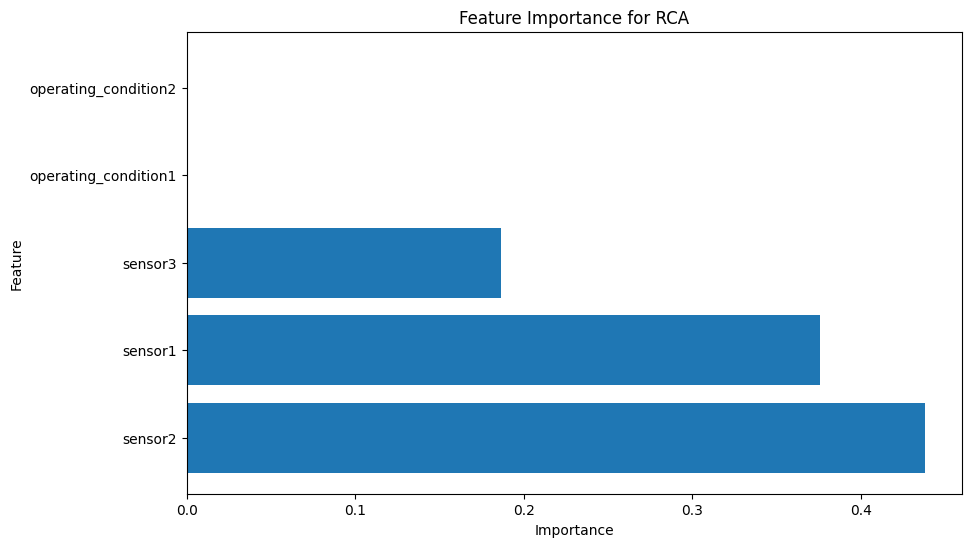

                Feature  Importance
1               sensor2    0.437871
0               sensor1    0.375740
2               sensor3    0.186389
3  operating_condition1    0.000000
4  operating_condition2    0.000000


In [8]:
# Get feature importance
importance = model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for RCA')
plt.show()

print(feature_importance_df)


In [9]:
pip install shap

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------- ----------- 41.0/57.6 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 606.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/456.2 kB ? eta -:--:--
   -------- ------------------------------- 92.2/456.2 kB 2.6 MB/s eta 0:00:01
   ------------------ --------------------- 215.0/456.2 kB 2.2 MB/s eta 0:00:01
   ---------------------------- ----------- 327.7/456.2 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------  450.6/456.2 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 456.2/456.2 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   ---------------------------------------- 78.3/78.3 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   -- ------------------------------------- 0.1/2.7 MB 2.9 MB/s eta 0:00:01
   --

In [10]:
import shap

TypeError: only integer scalar arrays can be converted to a scalar index

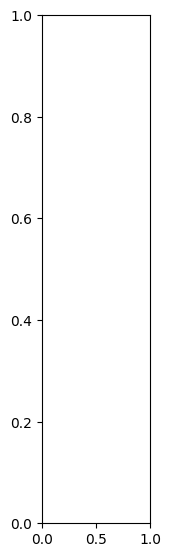

In [11]:
# Initialize the SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")


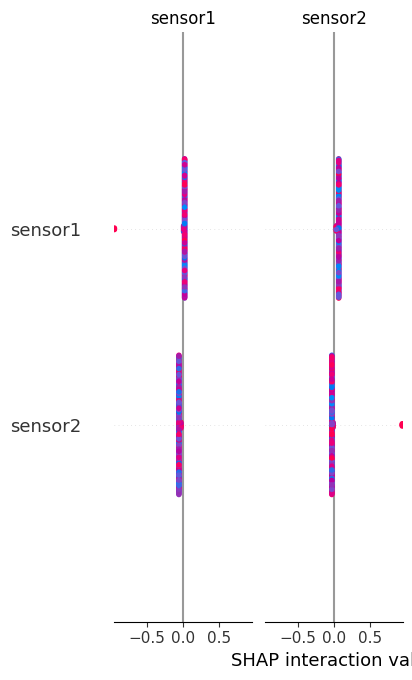

In [14]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
if isinstance(shap_values, list):
    shap_values = shap_values[1]
shap.summary_plot(shap_values, X_test, plot_type="bar")